License
Copyright 2019 Navdeep Gill, Patrick Hall, Kim Montgomery, Nick Schmidt

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

DISCLAIMER: This notebook is not legal compliance advice.

In [1]:
import h2o
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_path = os.sep.join(['..', 'data', 'output', 'hmda_train_processed.csv'])
train = pd.read_csv(train_path)

test_path = os.sep.join(['..', 'data', 'output', 'hmda_test_processed.csv'])
test = pd.read_csv(test_path)

In [3]:
train.head()

,Unnamed: 0,high_priced,term_360,conforming,black,asian,white,amind,hipac,hispanic,...,agelt62,cv_fold,debt_to_income_ratio_missing,loan_amount_std,loan_to_value_ratio_std,no_intro_rate_period_std,intro_rate_period_std,property_value_std,income_std,debt_to_income_ratio_std
0,2549300,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1,False,-0.514393,0.333922,0.244394,-0.215304,-0.535932,-0.040307,0.854601
1,4000757,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,5,False,-0.118642,0.268727,0.244394,-0.215304,-0.227585,-0.018133,-0.425131
2,1546928,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5,False,-0.778227,0.228996,-4.091747,4.610857,-0.720941,-0.032338,0.123326
3,5453145,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,3,False,-0.074670,-1.150240,0.244394,-0.215304,0.358276,-0.018133,-0.425131
4,4943130,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,4,False,-0.602338,0.552520,0.244394,-0.215304,-0.628437,-0.038228,0.763191


In [4]:
test.head()

,Unnamed: 0,high_priced,term_360,conforming,black,asian,white,amind,hipac,hispanic,...,agegte62,agelt62,debt_to_income_ratio_missing,loan_amount_std,loan_to_value_ratio_std,no_intro_rate_period_std,intro_rate_period_std,property_value_std,income_std,debt_to_income_ratio_std
0,131497,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,NaN,NaN,False,-0.470421,0.345133,0.244394,-0.215304,-0.505098,-0.008085,-2.527547
1,851117,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,False,0.321082,0.342439,-4.091747,3.203226,0.080763,-0.010857,-1.156406
2,835616,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,False,-0.118642,0.552520,0.244394,-0.215304,-0.289254,-0.016054,1.037419
3,121491,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,False,-0.646310,-1.191974,0.244394,-0.215304,-0.320089,-0.029220,0.031916
4,4479643,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,False,0.277109,0.336837,0.244394,-0.215304,0.049928,0.000577,0.763191


In [28]:
test['property_value_std'].describe()

count    39662.000000
mean         0.005967
std          0.992264
min         -1.029289
25%         -0.535932
50%         -0.258419
75%          0.173267
max         27.400375
Name: property_value_std, dtype: float64

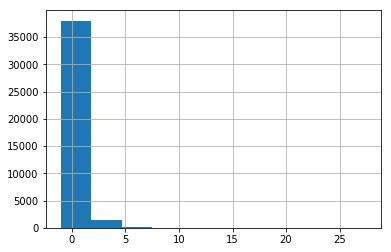

In [12]:
test['property_value_std'].hist()

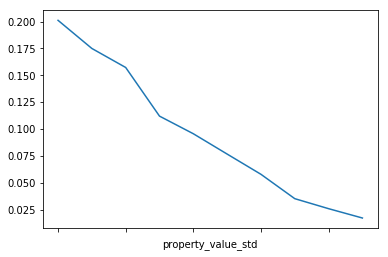

In [18]:
pv_qtile_hp = test.groupby(pd.qcut(test.property_value_std, 10))['high_priced'].mean()
pv_qtile_hp.plot()

In [19]:
pv_qtile_hp

property_value_std
(-1.0299999999999998, -0.69]    0.201211
(-0.69, -0.598]                 0.175023
(-0.598, -0.474]                0.157323
(-0.474, -0.382]                0.112035
(-0.382, -0.258]                0.095634
(-0.258, -0.104]                0.076705
(-0.104, 0.0499]                0.057862
(0.0499, 0.327]                 0.035185
(0.327, 0.913]                  0.025862
(0.913, 27.4]                   0.017172
Name: high_priced, dtype: float64

In [20]:
# Read in data with MGBM preds
test_yhat = pd.read_csv('../data/output/test_hmda_with_preds.csv')

In [21]:
test_yhat.head()

,Unnamed: 0,high_priced,term_360,conforming,black,asian,white,amind,hipac,hispanic,...,loan_amount_std,loan_to_value_ratio_std,no_intro_rate_period_std,intro_rate_period_std,property_value_std,income_std,debt_to_income_ratio_std,high_priced_mgbm_pred,high_priced_gbm_pred,Id
0,131497,0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.470421,0.345133,0.244394,-0.215304,-0.505098,-0.008085,-2.527547,0.082931,0.086389,0
1,851117,0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.321082,0.342439,-4.091747,3.203226,0.080763,-0.010857,-1.156406,0.023571,0.017098,1
2,835616,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.118642,0.552520,0.244394,-0.215304,-0.289254,-0.016054,1.037419,0.182041,0.203766,2
3,121491,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.646310,-1.191974,0.244394,-0.215304,-0.320089,-0.029220,0.031916,0.013434,0.008268,3
4,4479643,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.277109,0.336837,0.244394,-0.215304,0.049928,0.000577,0.763191,0.069666,0.074796,4


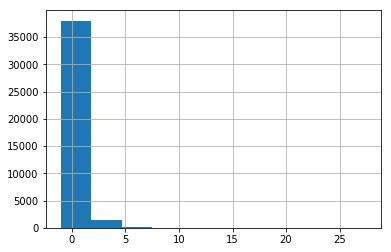

In [22]:
test_yhat['property_value_std'].hist()

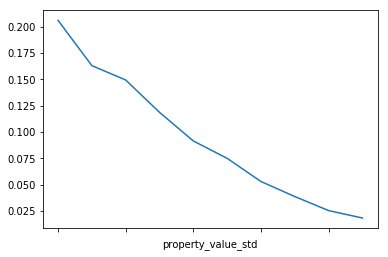

In [25]:
pv_qtile_hp_mgbm_pred = test_yhat.groupby(pd.qcut(test_yhat.property_value_std, 10))['high_priced_mgbm_pred'].mean()
pv_qtile_hp_mgbm_pred.plot()

In [26]:
pv_qtile_hp_mgbm_pred

property_value_std
(-1.0299999999999998, -0.69]    0.206070
(-0.69, -0.598]                 0.163074
(-0.598, -0.474]                0.149456
(-0.474, -0.382]                0.118750
(-0.382, -0.258]                0.091575
(-0.258, -0.104]                0.075093
(-0.104, 0.0499]                0.053071
(0.0499, 0.327]                 0.038822
(0.327, 0.913]                  0.025490
(0.913, 27.4]                   0.018432
Name: high_priced_mgbm_pred, dtype: float64

In [32]:
# init h2o
h2o.init(min_mem_size='30G')
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_201"; Java(TM) SE Runtime Environment (build 1.8.0_201-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from /home/navdeep/article-information-2019/inf_env/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp7nli7mkt
  JVM stdout: /tmp/tmp7nli7mkt/h2o_navdeep_started_from_python.out
  JVM stderr: /tmp/tmp7nli7mkt/h2o_navdeep_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.9
H2O cluster version age:,1 month and 18 days
H2O cluster name:,H2O_from_python_navdeep_uq74x7
H2O cluster total nodes:,1
H2O cluster free memory:,28.75 Gb
H2O cluster total cores:,40
H2O cluster allowed cores:,40
H2O cluster status:,"accepting new members, healthy"


In [33]:
from h2o.estimators.random_forest import H2ORandomForestEstimator 
from h2o.backend import H2OLocalServer                      

# system packages for calling external graphviz processes
import re
import subprocess

# in-notebook display
from IPython.display import Image
from IPython.display import display
%matplotlib inline

In [35]:
test_yhat_hex = h2o.H2OFrame(test_yhat)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [36]:
model_id = 'dt_surrogate_mojo'
# Inputs and output
X = ['term_360',
'conforming',
'debt_to_income_ratio_missing',
'loan_amount_std',
'loan_to_value_ratio_std',
'no_intro_rate_period_std',
'intro_rate_period_std',
'property_value_std',
'income_std',
'debt_to_income_ratio_std']
Y = 'high_priced_mgbm_pred'
# initialize single tree surrogate model
surrogate = H2ORandomForestEstimator(ntrees=1,          # use only one tree
                                     sample_rate=1,     # use all rows in that tree
                                     mtries=-2,         # use all columns in that tree
                                     max_depth=3,       # shallow trees are easier to understand
                                     seed=12345,        # random seed for reproducibility
                                     model_id=model_id) # gives MOJO artifact a recognizable name

# train single tree surrogate model
surrogate.train(x=X, y=Y, training_frame=test_yhat_hex)

# persist MOJO (compiled, representation of trained model)
# from which to generate plot of surrogate
mojo_path = surrogate.download_mojo(path='.')
print('Generated MOJO path:\n', mojo_path)

drf Model Build progress: |███████████████████████████████████████████████| 100%
Generated MOJO path:
 /home/navdeep/article-information-2019/notebooks/dt_surrogate_mojo.zip


In [37]:

# title for plot
title = 'HMDA High Priced Decision Tree Surrogate'  

# locate h2o jar
hs = H2OLocalServer()
h2o_jar_path = hs._find_jar()
print('Discovered H2O jar path:\n', h2o_jar_path)

# construct command line call to generate graphviz version of 
# surrogate tree see for more information: 
# http://docs.h2o.ai/h2o/latest-stable/h2o-genmodel/javadoc/index.html
gv_file_name = model_id + '.gv'
gv_args = str('-cp ' + h2o_jar_path +
              ' hex.genmodel.tools.PrintMojo --tree 0 -i '
              + mojo_path + ' -o').split()
gv_args.insert(0, 'java')
gv_args.append(gv_file_name)
if title is not None:
    gv_args = gv_args + ['--title', title]
    
# call 
print()
print('Calling external process ...')
print(' '.join(gv_args))
_ = subprocess.call(gv_args)

Discovered H2O jar path:
 /home/navdeep/article-information-2019/inf_env/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar

Calling external process ...
java -cp /home/navdeep/article-information-2019/inf_env/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar hex.genmodel.tools.PrintMojo --tree 0 -i /home/navdeep/article-information-2019/notebooks/dt_surrogate_mojo.zip -o dt_surrogate_mojo.gv --title HMDA High Priced Decision Tree Surrogate


In [38]:
# construct call to generate PNG from 
# graphviz representation of the tree
png_file_name = model_id + '.png'
png_args = str('dot -Tpng ' + gv_file_name + ' -o ' + png_file_name)
png_args = png_args.split()

# call
print('Calling external process ...')
print(' '.join(png_args))
_ = subprocess.call(png_args)

Calling external process ...
dot -Tpng dt_surrogate_mojo.gv -o dt_surrogate_mojo.png


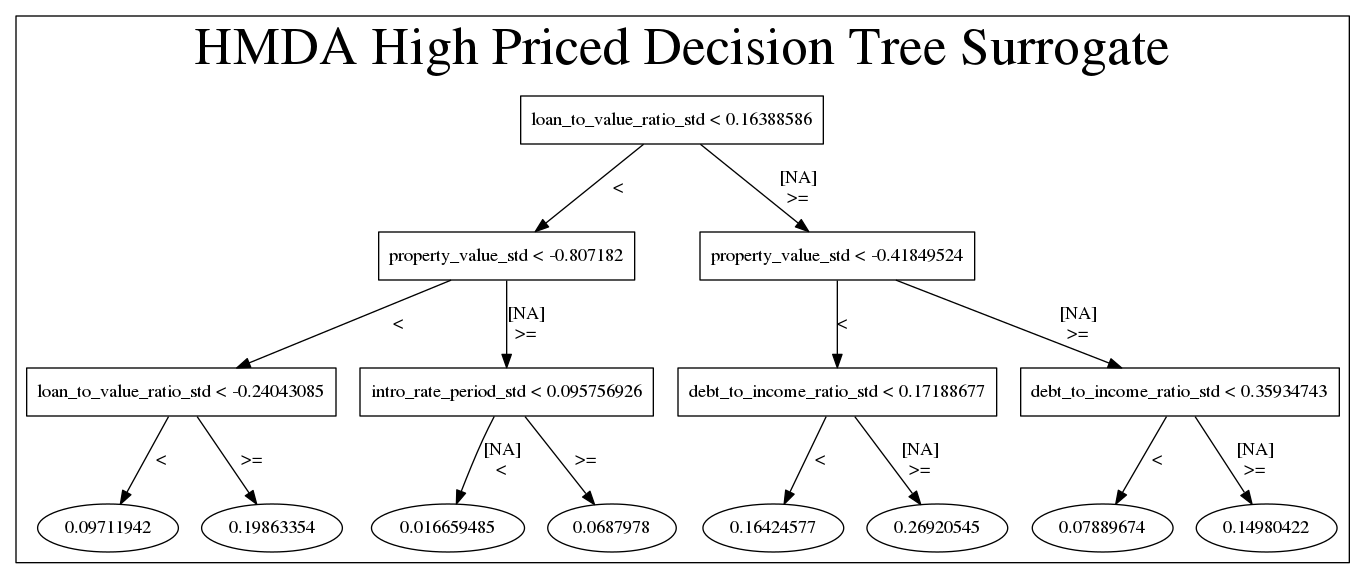

In [39]:
# display in-notebook
display(Image((png_file_name)))

# Above Interactions in Original Test Data

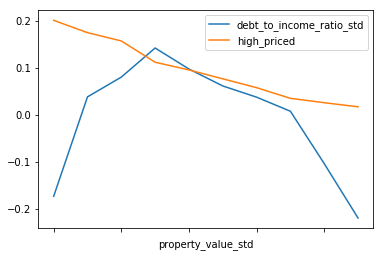

In [50]:
pv_quantile_dti = test.groupby(pd.qcut(test.property_value_std, 10))['debt_to_income_ratio_std', 'high_priced'].mean()
pv_quantile_dti.plot()

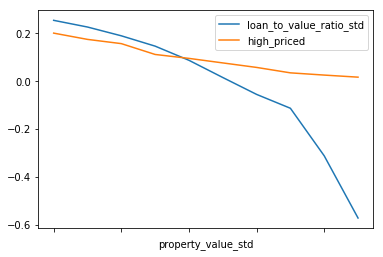

In [43]:
pv_quantile_ltv = test.groupby(pd.qcut(test.property_value_std, 10))['loan_to_value_ratio_std', 'high_priced'].mean()
pv_quantile_ltv.plot()

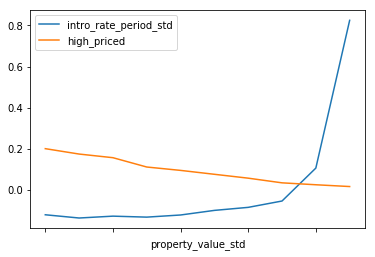

In [48]:
pv_quantile_irp = test.groupby(pd.qcut(test.property_value_std, 10))['intro_rate_period_std', 'high_priced'].mean()
pv_quantile_irp.plot()